# do some stuffs for mnist dataset

## visualize distribution of clients

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [37]:
def draw_distribution(data, axis, filename):
    profile = np.zeros((10,2))
    profile[:,0] = range(10)
    for key in data.keys():
        profile[int(key),1] = len(data[key])
    axis.bar(x=profile[:,0], height=profile[:,1])
    # axis.set_title(list(data.keys()))
    axis.set_title(filename)

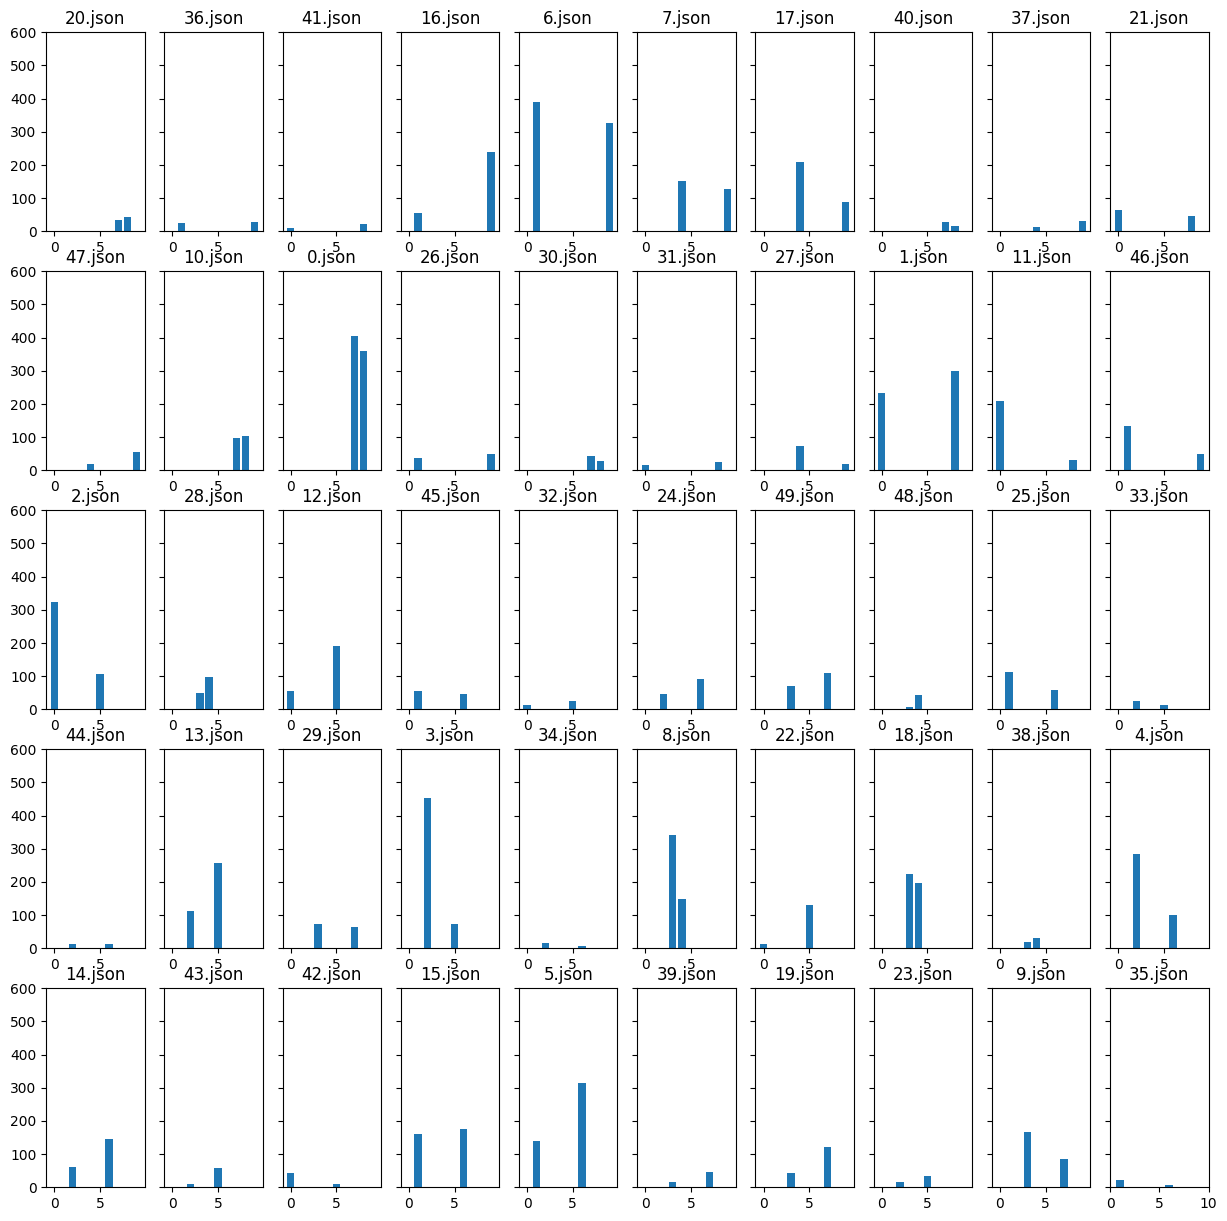

In [38]:
dir = './client_test/'
fig, axis = plt.subplots(nrows=5, ncols=10, figsize=(15, 15), sharey=True)
fig.subplots_adjust(hspace=0.2)
plt.xlim([0, 10])
plt.ylim([0, 600])

for idx, file in enumerate(os.listdir(dir)):
    with open(os.path.join(dir, file), 'r') as fi:
        data = json.load(fi)
    draw_distribution(data, axis.flat[idx], file)

---

## test mnist loader

In [21]:
import torch
from torch.utils.data import Dataset, DataLoader
import json
import matplotlib.pyplot as plt

In [7]:
class MnistDataset(Dataset):
    def __init__(self, file_path:str) -> None:
        super().__init__()
        with open(file_path, 'r') as fi:
            data_tmp:dict = json.load(fi)

        self.X = torch.cat([torch.Tensor(data_tmp[key]) for key in data_tmp.keys()])
        self.y = torch.cat([torch.full((len(data_tmp[key]),1), int(key)) for key in data_tmp.keys()])

    def __getitem__(self, index):
        ''' return torch.Size([728]), torch.Size([1])'''
        return self.X[index], self.y[index]

def get_loader(file_path, batch_size=32, shuffle=True):
    dataset = MnistDataset(file_path)
    return DataLoader(
        dataset=dataset,
        batch_size=batch_size,
        shuffle=shuffle
    )


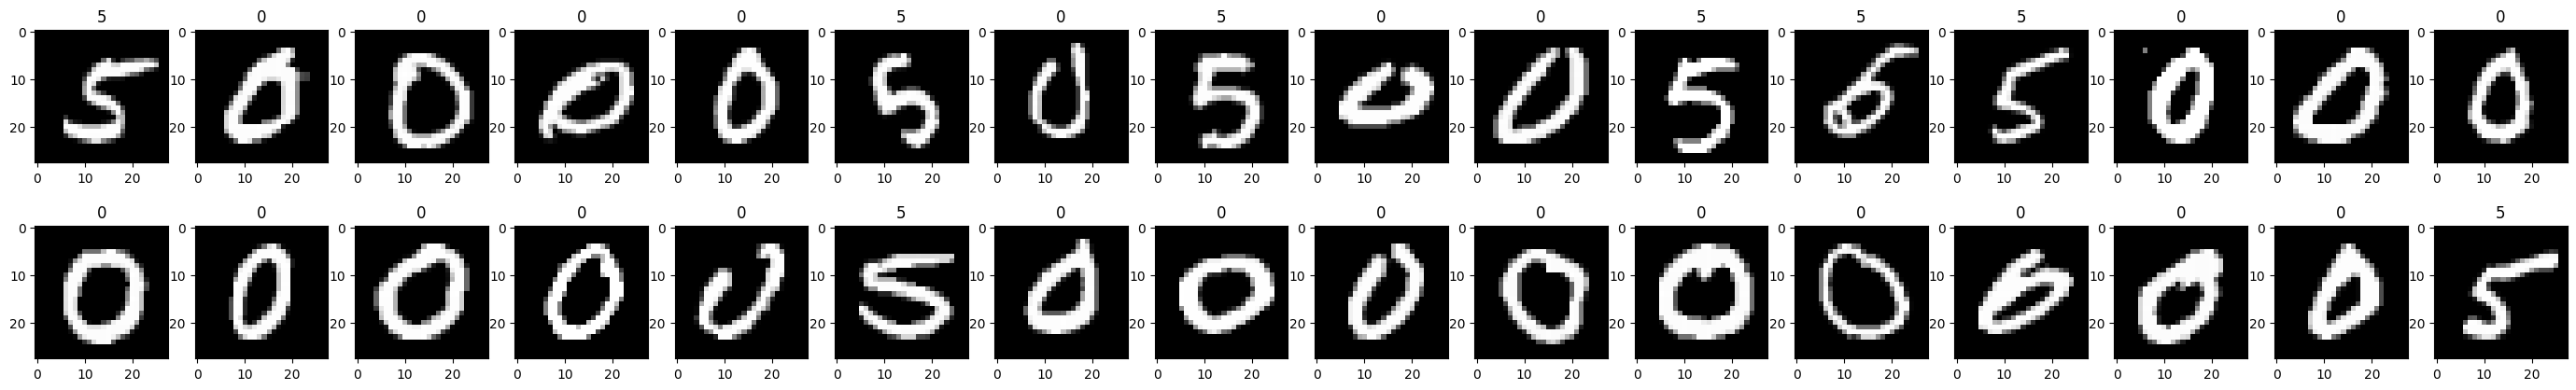

In [40]:
fig, axs = plt.subplots(nrows=2, ncols=16, figsize=(35,5))
count = 0
fig.subplots_adjust(hspace=0.2)

loader = get_loader('./client_test/2.json')
for batch in loader:
    for x, y in zip(batch[0], batch[1]):
        axs.flat[count].imshow(x.reshape((28,28)), cmap='gray')
        axs.flat[count].set_title(int(y))
        count += 1
    break